In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as animation
import seaborn as sns

sns.set(font_scale=1.6, palette='RdBu')

## Методы оптимизации

Методы оптимизации широко используются в анализе данных и машинном обучении. Например, они применяются при обучении линейной регрессии с **lasso** или **elastic net** регуляризацией. Кроме того, на оптимизации функции потерь основано обучение любых нейронных сетей. Поэтому каждый, кто планирует заниматься анализом данных, должен знать основные методы оптимизации.

**Базовые элементы оптимизации.**

1. Переменные - параметры, по которым требуется оптимизировать функцию.

2. Ограничения - границы, в которых могут варьироваться переменные.

3. Функция потерь - функция, которую минимизирует метод.

Постановка задачи оптимизации - определение функции потерь и переменных, по которым будет минимизироваться функция потерь и ограничений на эти переменные.

### Основные методы оптимизации.

Пусть задача оптимизации имеет вид $f(\theta) \to \min_\theta$, и $\nabla_{\theta} f(\theta)$ - градиент функции $f(\theta)$.

Все методы, рассматриваемые здесь, являются итеративными. Они последовательно приближают текущее значение параметра $\theta$ к оптимальному $\theta^*$.

1. **Градиентный спуск (GD - Gradient Descent).**

$$\theta_{t+1} = \theta_t - \eta \nabla_{\theta} f(\theta_t)$$

Здесь изменение параметра $\theta$ происходит по направлению антиградиента. Метод градиентного спуска основан на том факте, что антиградиент - направление наибольшего локального убывания функции. Поскольку, это свойство антиградиента локально, на каждом шаге антиградиент вычитается с заданным коэффициентом $\eta$, как правило, меньшим 1. Подбор $\eta$ осуществляется пользователем.

2. **Покоординатный градиентый спуск.**

Часто приходится оптимизировать функции от большого числа переменных. В таком случае можно не ждать вычисления градиента сразу по всем переменным, а обновлять их значения после вычисления частной производной по компонентам. Иначе говоря, шаг не по направлению градиента, а в направлении отдельных компонент градиента.

Таким образом, шаг покоординатного спуска можно записать так:

$$\theta^{(i)}_{t+1} = \theta^{(i)}_t - \eta \frac{\partial f}{\partial \theta_i} f(\theta_t).$$


3. **Метод тяжелого шара (Momentum).**

SGD считается относительно неплохим методом оптимизации и применяется на практике. Но у него есть ряд недостатков.
К таким недостаткам относятся - застревание в локальных минимумах или седловых точках (при слишком маленьком learning rate), а также "пролетание" узких глобальных минимумов (при слишком большом learning rate).

Для частичного исправления этих недостатков используют метод momentum, в котором направление шага метода постепенно накапливается.

$$v_t = \gamma v_{t-1} + \eta \nabla_{\theta} f(\theta_t),$$

$$\theta_{t+1} = \theta_t - v_t.$$

Чем больше значение $\gamma$, тем больше метод ориентируется на свои предыдущие действия. Как правило, значение $\gamma$ берут не менее 0.9.

4. **Метод Ньютона-Рафсона (в англоязычной литературе - Newton's Method).**

Этот метод, в отличие от всех рассмотренных выше, является методом оптимизации второго порядка.
Для того, чтобы лучше понять его суть, рассмотрим его вывод. Для оптимизируемой функции $f_{\theta}$ рассмотрим аппроксимацию 2 порядка:
$$f(\theta + h) \approx g(\theta + h) := f(\theta) + h^T f'(\theta) + \frac{1}{2}h^T f''(\theta)h.$$

Пусть мы хотим минимизировать $g(\theta).$ Тогда из необходимого условия локального минимума:

$$f'(\theta) + f''(\theta)h = 0,$$

$$h = -f''(\theta)^{-1}f'(\theta).$$

Шаг метода Ньютона-Рафсона выглядит так:

$$\theta_{t+1} = \theta_t - \eta \cdot f''(\theta)^{-1}f'(\theta).$$

### Эксперименты.

Нет универсального метода оптимизации, который всегда работает лучше, чем остальные. Поэтому для выбора наилучшего метода оптимизации и оптимальных гиперпараметров для него проводят ряд экспериментов.
Ниже приведена визуализация нескольких экспериментов и сравнение скорости сходимости различных методов оптимизации, запущенных из одной точки.


Реализуем методы оптимизации.

In [2]:
def gradient_descent(theta0, func_grad, eta, iter_count=15_0):
    '''
    Градиентный спуск.
    
    Параметры.
    1) theta0 - начальное приближение theta,
    2) func_grad - функция, задающая градиент оптимизируемой функции,
    3) eta - скорость обучения,
    4) iter_count - количество итераций метода.
    '''
    
    theta = theta0
    history = [theta0]
    
    for iter_id in range(iter_count):
        theta = theta - eta * func_grad(theta)
        history.append(theta)
    return history


def coord_descent(theta0, func_grad, eta, iter_count=150):
    '''
    Покоординатный градиентный спуск.
    
    Параметры.
    1) theta0 - начальное приближение theta,
    2) func_grad - функция, задающая градиент оптимизируемой функции,
    3) eta - скорость обучения,
    4) iter_count - количество итераций метода.
    '''
    
    d = len(theta0)
    
    theta = theta0
    history = [theta0.copy()]
    
    for iter_id in range(iter_count):
        for coord_id in range(d):
            theta[coord_id] = theta[coord_id] \
                            - eta * func_grad(theta)[coord_id]
            history.append(theta.copy())
    return history


def momentum(theta0, func_grad, eta, gamma, iter_count=150):
    '''
    Метод тяжелого Шарика.
    
    Параметры.
    1) theta0 - начальное приближение theta,
    2) func_grad - функция, задающая градиент оптимизируемой функции,
    3) eta - скорость обучения,
    4) gamma - параметр инерции,
    5) iter_count - количество итераций метода.
    '''
    
    theta = theta0
    history = [theta0]
    v = theta0
    
    for iter_id in range(iter_count):
        v = gamma * v + eta * func_grad(theta)
        theta = theta - v
        history.append(theta) 
    return history


def newton(theta0, func_grad, func_hessian, eta, iter_count=150):
    '''
    Метод Ньютона-Равсона.
    
    Параметры.
    1) theta0 - начальное приближение theta,
    2) func_grad - функция, задающая градиент оптимизируемой функции,
    3) func_hessian - функция, задающая гессиан оптимизируемой функции,
    3) eta - скорость обучения,
    4) iter_count - количество итераций метода.
    '''
    
    theta = theta0
    history = [theta0]
    
    for iter_id in range(iter_count):
        theta = theta \
            - eta * (np.linalg.inv(func_hessian(theta)) @ func_grad(theta))
        history.append(theta)
    return history

Реализуем функции, которые будем оптимизировать.

In [3]:
def square_sum(x):
    return 5 * x[0]**2 + x[1]**2

def square_sum_grad(x):
    return np.array([10, 2]) * x

def square_sum_hessian(x):
    return np.diag([10, 2])

Создадим директорию, в которой будем хранить визуализацию экспериментов.

In [4]:
!rm -rf saved_gifs
!mkdir saved_gifs

In [5]:
def make_experiment(func, trajectory, graph_title):
    '''
    Функция, которая для заданной функции рисует её линии уровня, а также 
    траекторию сходимости метода оптимизации.
    
    Параметры.
    1) func - оптимизируемая функция,
    2) trajectory - траектория метода оптимизации,
    3) graph_name - заголовок графика.
    '''
    
    fig, ax = plt.subplots(figsize=(10, 8))
    xdata, ydata = [], []
    ln, = plt.plot([], [])
    
    mesh = np.linspace(-15.0, 15.0, 300)
    X, Y = np.meshgrid(mesh, mesh)
    Z = np.zeros((len(mesh), len(mesh)))
    
    for coord_x in range(len(mesh)):
        for coord_y in range(len(mesh)):
            Z[coord_x][coord_y] = func(np.array((mesh[coord_x], 
                                                 mesh[coord_y])))
    
    def init():
        ax.contour(X, Y, np.log(Z), 
                   np.log([2, 10, 30, 80, 130, 200, 300, 500, 900]), 
                   cmap='winter')
        ax.set_title(graph_title)
        return ln,

    def update(frame):
        xdata.append(trajectory[frame][0])
        ydata.append(trajectory[frame][1])
        ln.set_data(xdata, ydata)
        return ln,
    
    ani = animation.FuncAnimation(
        fig, update, frames=range(len(trajectory)),
        init_func=init, repeat=True
    )
    ani.save(f'saved_gifs/{graph_title}.gif', 
             writer='imagemagick', fps=5)

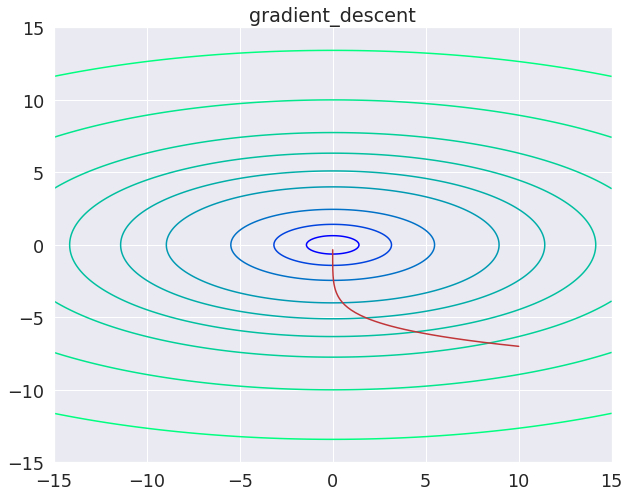

In [6]:
gd_trajectory = gradient_descent(np.array((10, -7)), square_sum_grad, 0.01)
make_experiment(square_sum, gd_trajectory, 'gradient_descent')

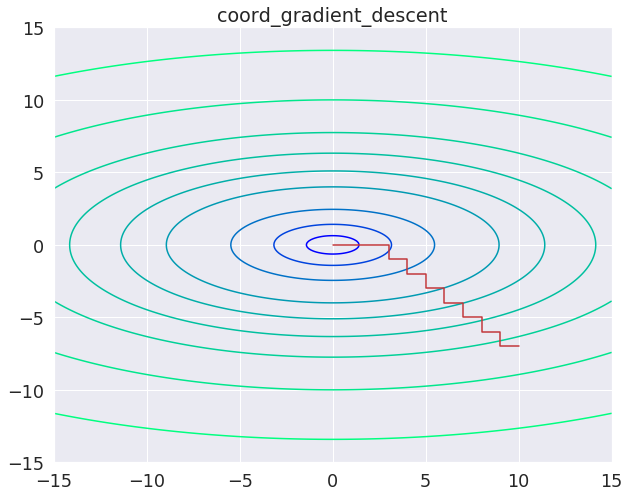

In [7]:
coord_gd_trajectory = coord_descent(np.array((10, -7)), square_sum_grad, 0.01, 30)
make_experiment(square_sum, coord_gd_trajectory, 'coord_gradient_descent')

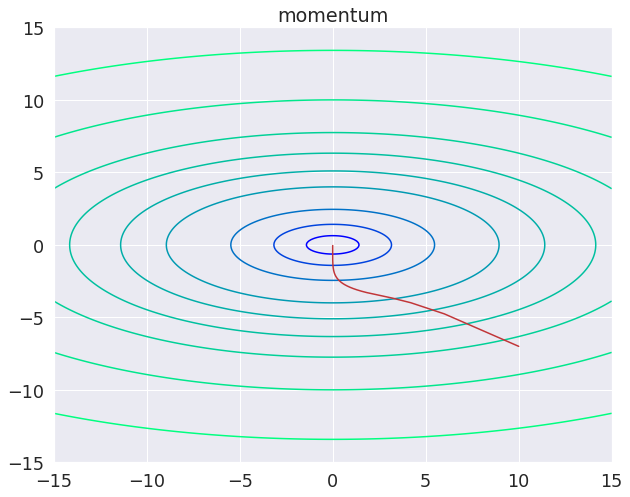

In [8]:
momentum_trajectory = momentum(np.array((10, -7)), square_sum_grad, 0.01, 0.3)
make_experiment(square_sum, momentum_trajectory, 'momentum')

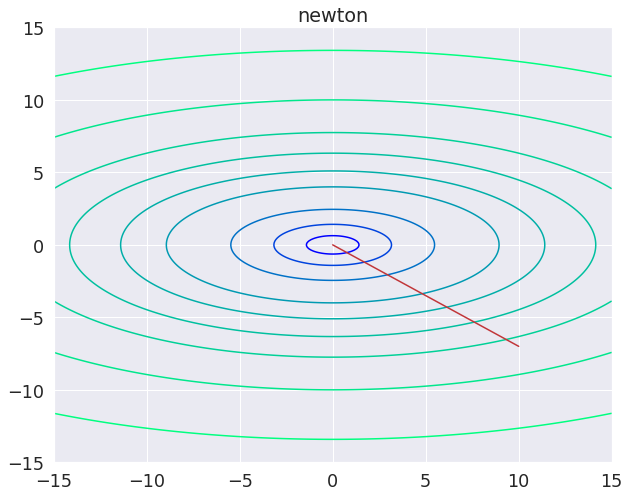

In [9]:
newton_trajectory = newton(np.array((10, -7)), square_sum_grad, square_sum_hessian, 0.1)
make_experiment(square_sum, newton_trajectory, 'newton')